### Mass Analysis for 55 analytes
###  Edgar Acuna
#### June 2021

In [1]:
import scipy.io
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
mat = scipy.io.loadmat('C:/Users/eacun/Downloads/dataset55_release2.mat')

### Loading the data

In [2]:
mat.items()

dict_items([('__header__', b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Jul 22 14:13:11 2020'), ('__version__', '1.0'), ('__globals__', []), ('addedNoisePercent', array([[0.1],
       [0.5],
       [0. ],
       ...,
       [1. ],
       [0.1],
       [0. ]])), ('labels', array([[ 1],
       [ 1],
       [ 1],
       ...,
       [55],
       [55],
       [55]], dtype=uint8)), ('massLoadings', array([[90.48134734],
       [90.48134734],
       [90.48134734],
       ...,
       [93.56603952],
       [93.56603952],
       [93.56603952]])), ('spectra', array([[0.01684698, 0.01575019, 0.01553012, ..., 0.01631328, 0.01523777,
        0.01464116],
       [0.01862416, 0.01217942, 0.02092375, ..., 0.01522821, 0.02158774,
        0.01224737],
       [0.01634829, 0.01627708, 0.01620733, ..., 0.01681628, 0.01679286,
        0.0167685 ],
       ...,
       [0.01777366, 0.02470746, 0.04042846, ..., 0.52899222, 0.53342443,
        0.54125978],
       [0.03112273, 0.02996503, 0.03299245, 

In [3]:
mass=mat['massLoadings']
a=np.unique(mass)

In [4]:
noise=mat["addedNoisePercent"]
print(np.unique(noise,return_counts=True))

(array([0.  , 0.1 , 0.25, 0.5 , 1.  ]), array([ 9887,  9966,  9648, 10022,  9977], dtype=int64))


In [5]:
y=mat['labels']

In [6]:
ys=mat['substrateIDs']

In [7]:
df=mat['spectra']
df=pd.DataFrame(df)
print(df.shape)

(49500, 1701)


In [8]:
dfset2=df.copy()
dfset2['Analyte']=y
dfset2['substrate']=ys
dfset2['MassLoadings']=mass
#dfset2.head()
#dfset2=dfset2[5<dfset2.MassLoadings<50]
dfset2.shape

(49500, 1704)

### Statistical measures and Histograms  of Mass Loadings for each Analyte

array([[<AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>],
       [<AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>],
       [<AxesSubplot:title={'center':'15'}>,
        <AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>,
        <AxesSubplot:title={'center':'20'}>,
        <AxesSubplot:title={'center':'21'}>],
       [<AxesSubplot:title={'center':'22'}>,
        <AxesSub

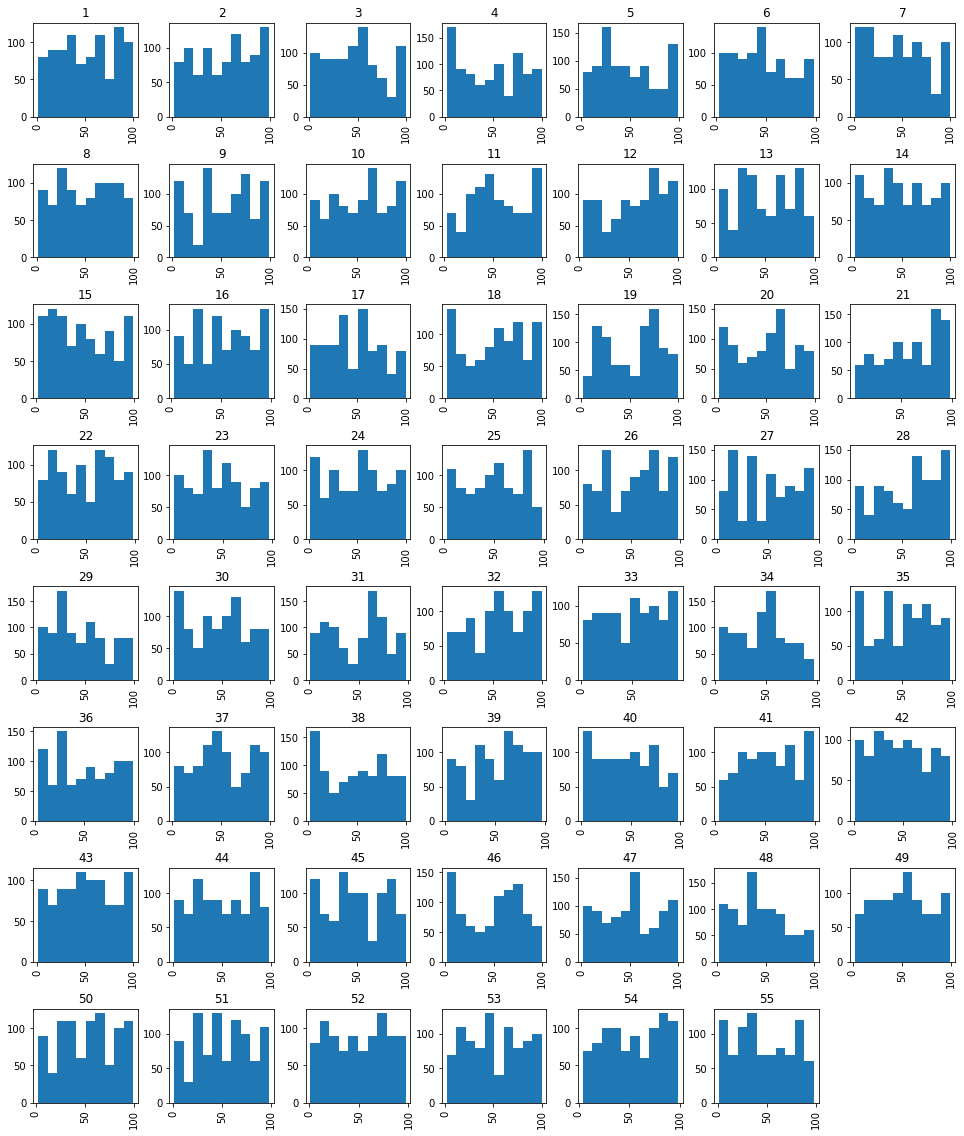

In [9]:
dfset2.MassLoadings.hist(by=dfset2.Analyte,figsize=(16,20))

In [10]:
dfset2.groupby(["Analyte"])["MassLoadings"].describe()

,count,mean,std,min,25%,50%,75%,max
Analyte,,,,,,,,
1,900.0,51.768430,29.133943,1.168080,27.577848,51.673486,78.719423,99.916174
2,900.0,53.588368,28.793554,2.213669,30.087675,55.449280,79.691998,99.084845
3,900.0,47.888669,27.853912,1.316766,26.696316,47.877576,67.869020,99.656957
4,900.0,47.769686,30.662262,1.846249,15.812723,45.714943,75.628212,99.507215
5,900.0,48.325118,28.675876,1.465322,24.273818,42.968507,70.306313,99.318612
6,900.0,47.597956,26.909583,3.244167,25.856507,44.974466,65.506991,98.398306
7,900.0,45.957357,28.610285,1.156934,19.637130,47.598756,68.753124,99.974547
8,900.0,50.983822,27.860651,1.597202,28.261332,51.313435,74.473544,99.111748
9,900.0,52.965966,29.387237,2.281453,32.554447,53.418094,76.734130,99.468847


In [11]:
a=dfset2.groupby(["Analyte"])["MassLoadings"].describe()
a.head()

,count,mean,std,min,25%,50%,75%,max
Analyte,,,,,,,,
1,900.0,51.768430,29.133943,1.168080,27.577848,51.673486,78.719423,99.916174
2,900.0,53.588368,28.793554,2.213669,30.087675,55.449280,79.691998,99.084845
3,900.0,47.888669,27.853912,1.316766,26.696316,47.877576,67.869020,99.656957
4,900.0,47.769686,30.662262,1.846249,15.812723,45.714943,75.628212,99.507215
5,900.0,48.325118,28.675876,1.465322,24.273818,42.968507,70.306313,99.318612


In [12]:
a['SNR']=a['mean']/a['std']
a

,count,mean,std,min,25%,50%,75%,max,SNR
Analyte,,,,,,,,,
1,900.0,51.768430,29.133943,1.168080,27.577848,51.673486,78.719423,99.916174,1.776911
2,900.0,53.588368,28.793554,2.213669,30.087675,55.449280,79.691998,99.084845,1.861124
3,900.0,47.888669,27.853912,1.316766,26.696316,47.877576,67.869020,99.656957,1.719280
4,900.0,47.769686,30.662262,1.846249,15.812723,45.714943,75.628212,99.507215,1.557931
5,900.0,48.325118,28.675876,1.465322,24.273818,42.968507,70.306313,99.318612,1.685219
6,900.0,47.597956,26.909583,3.244167,25.856507,44.974466,65.506991,98.398306,1.768811
7,900.0,45.957357,28.610285,1.156934,19.637130,47.598756,68.753124,99.974547,1.606323
8,900.0,50.983822,27.860651,1.597202,28.261332,51.313435,74.473544,99.111748,1.829958
9,900.0,52.965966,29.387237,2.281453,32.554447,53.418094,76.734130,99.468847,1.802346


In [13]:
a.describe()

,count,mean,std,min,25%,50%,75%,max,SNR
count,55.0,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,900.0,50.465858,28.217968,1.945437,26.631842,51.068137,74.090413,98.817319,1.790285
std,0.0,2.963583,1.021273,0.881982,4.241310,4.871541,4.691387,1.146374,0.116965
min,900.0,44.415920,24.632140,1.019975,15.812723,41.725015,62.401624,94.967618,1.557931
25%,900.0,48.232390,27.697334,1.276604,24.067771,48.028426,71.155966,98.175465,1.710626
50%,900.0,50.350931,28.141347,1.618532,27.091409,50.717523,74.797591,99.245427,1.779872
75%,900.0,52.716198,28.809815,2.352185,29.183322,53.923835,77.262623,99.665396,1.873100
max,900.0,58.355220,30.662262,4.850490,35.860721,61.691887,83.567840,99.996539,2.132093


#### There is not much difference between the distribution of the analytes

### Removing the substrate effect

In [14]:
dfsub1=dfset2[dfset2['substrate']==1]
dfsub2=dfset2[dfset2['substrate']==2]
dfsub3=dfset2[dfset2['substrate']==3]
dfsub4=dfset2[dfset2['substrate']==4]
dfsub5=dfset2[dfset2['substrate']==5]
dfsub6=dfset2[dfset2['substrate']==6]
dfsub7=dfset2[dfset2['substrate']==7]
dfsub8=dfset2[dfset2['substrate']==8]
dfsub9=dfset2[dfset2['substrate']==9]

In [15]:
dfsub1.head(7)

,0,1,2,3,4,5,6,7,8,9,...,1694,1695,1696,1697,1698,1699,1700,Analyte,substrate,MassLoadings
0,0.016847,0.015750,0.015530,0.014852,0.015202,0.015420,0.016572,0.014220,0.014954,0.014995,...,0.017741,0.017533,0.016542,0.016122,0.016313,0.015238,0.014641,1,1,90.481347
1,0.018624,0.012179,0.020924,0.003329,0.014498,0.019329,0.011184,0.010919,0.007558,0.017733,...,0.018193,0.017089,0.018461,0.020192,0.015228,0.021588,0.012247,1,1,90.481347
2,0.016348,0.016277,0.016207,0.016139,0.016066,0.015951,0.015780,0.015613,0.015557,0.015594,...,0.016905,0.016884,0.016862,0.016839,0.016816,0.016793,0.016769,1,1,90.481347
3,0.015725,0.018253,0.018749,0.017823,0.016850,0.015230,0.017195,0.011854,0.013581,0.011075,...,0.018257,0.012629,0.014090,0.016704,0.016195,0.017715,0.011852,1,1,90.481347
4,0.018868,0.024683,0.016563,0.020112,0.018959,0.017602,0.016099,0.009405,0.020006,0.019105,...,0.019433,0.015924,0.006780,0.015658,0.017236,0.019725,0.015868,1,1,90.481347
5,0.017149,0.016915,0.016193,0.017177,0.017064,0.018811,0.015832,0.018110,0.017151,0.016886,...,0.018070,0.017615,0.017721,0.017868,0.018271,0.017208,0.017681,1,1,90.481347
6,0.016897,0.016856,0.017312,0.016933,0.016497,0.017086,0.015488,0.014764,0.016686,0.017064,...,0.017297,0.018059,0.018717,0.015940,0.017928,0.016794,0.017581,1,1,90.481347


### 1- CENTERING

In [16]:
mdfsub1=dfsub1.iloc[:,0:1701]
mdfsub2=dfsub2.iloc[:,0:1701]
mdfsub3=dfsub3.iloc[:,0:1701]
mdfsub4=dfsub4.iloc[:,0:1701]
mdfsub5=dfsub5.iloc[:,0:1701]
mdfsub6=dfsub6.iloc[:,0:1701]
mdfsub7=dfsub7.iloc[:,0:1701]
mdfsub8=dfsub8.iloc[:,0:1701]
mdfsub9=dfsub9.iloc[:,0:1701]

In [19]:
subs=mat['substrateSpectra']
subs=pd.DataFrame(subs)
subs

,0,1,2,3,4,5,6,7,8,9,...,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700
0,0.008192,0.008116,0.008042,0.007970,0.007899,0.007830,0.007763,0.007697,0.007633,0.007570,...,0.010966,0.010943,0.010919,0.010895,0.010870,0.010845,0.010818,0.010792,0.010765,0.010737
1,0.035105,0.035617,0.036458,0.037003,0.037084,0.036102,0.035552,0.035033,0.034687,0.034424,...,0.040834,0.040778,0.040760,0.040794,0.040865,0.040946,0.041008,0.041036,0.041051,0.041070
2,0.585617,0.585672,0.585179,0.584104,0.585759,0.587581,0.588336,0.589407,0.590642,0.591676,...,0.559620,0.559569,0.559520,0.559472,0.559426,0.559382,0.559341,0.559301,0.559264,0.559230
3,0.026414,0.026214,0.026014,0.025770,0.025449,0.025250,0.025171,0.025119,0.025165,0.025351,...,0.546925,0.547225,0.547537,0.547909,0.548301,0.548652,0.548971,0.549233,0.549387,0.549484
4,0.011060,0.011381,0.011618,0.011406,0.010922,0.010713,0.010692,0.010628,0.010722,0.010908,...,0.023413,0.023356,0.023243,0.023115,0.023055,0.023158,0.023328,0.023359,0.023251,0.023180
5,0.064400,0.064528,0.064613,0.064131,0.063398,0.062792,0.062214,0.061542,0.060586,0.059307,...,0.277668,0.277010,0.276353,0.275671,0.274983,0.274299,0.273613,0.272943,0.272329,0.271673
6,0.035515,0.035251,0.034737,0.034093,0.033518,0.033043,0.032536,0.032043,0.031658,0.031341,...,0.253511,0.252787,0.252041,0.251235,0.250392,0.249560,0.248698,0.247776,0.246856,0.245963
7,0.031312,0.031438,0.031556,0.031777,0.031780,0.031608,0.031588,0.031441,0.031011,0.030551,...,0.569969,0.569996,0.570024,0.570030,0.570001,0.569943,0.569884,0.569884,0.569930,0.569966
8,0.000880,0.001132,0.004165,0.006112,0.005633,0.004667,0.003701,0.002964,0.002877,0.002152,...,0.010077,0.010496,0.010808,0.010552,0.010001,0.009687,0.009309,0.008746,0.008464,0.008364


In [20]:
print(type(subs))
subs

<class 'pandas.core.frame.DataFrame'>


,0,1,2,3,4,5,6,7,8,9,...,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700
0,0.008192,0.008116,0.008042,0.007970,0.007899,0.007830,0.007763,0.007697,0.007633,0.007570,...,0.010966,0.010943,0.010919,0.010895,0.010870,0.010845,0.010818,0.010792,0.010765,0.010737
1,0.035105,0.035617,0.036458,0.037003,0.037084,0.036102,0.035552,0.035033,0.034687,0.034424,...,0.040834,0.040778,0.040760,0.040794,0.040865,0.040946,0.041008,0.041036,0.041051,0.041070
2,0.585617,0.585672,0.585179,0.584104,0.585759,0.587581,0.588336,0.589407,0.590642,0.591676,...,0.559620,0.559569,0.559520,0.559472,0.559426,0.559382,0.559341,0.559301,0.559264,0.559230
3,0.026414,0.026214,0.026014,0.025770,0.025449,0.025250,0.025171,0.025119,0.025165,0.025351,...,0.546925,0.547225,0.547537,0.547909,0.548301,0.548652,0.548971,0.549233,0.549387,0.549484
4,0.011060,0.011381,0.011618,0.011406,0.010922,0.010713,0.010692,0.010628,0.010722,0.010908,...,0.023413,0.023356,0.023243,0.023115,0.023055,0.023158,0.023328,0.023359,0.023251,0.023180
5,0.064400,0.064528,0.064613,0.064131,0.063398,0.062792,0.062214,0.061542,0.060586,0.059307,...,0.277668,0.277010,0.276353,0.275671,0.274983,0.274299,0.273613,0.272943,0.272329,0.271673
6,0.035515,0.035251,0.034737,0.034093,0.033518,0.033043,0.032536,0.032043,0.031658,0.031341,...,0.253511,0.252787,0.252041,0.251235,0.250392,0.249560,0.248698,0.247776,0.246856,0.245963
7,0.031312,0.031438,0.031556,0.031777,0.031780,0.031608,0.031588,0.031441,0.031011,0.030551,...,0.569969,0.569996,0.570024,0.570030,0.570001,0.569943,0.569884,0.569884,0.569930,0.569966
8,0.000880,0.001132,0.004165,0.006112,0.005633,0.004667,0.003701,0.002964,0.002877,0.002152,...,0.010077,0.010496,0.010808,0.010552,0.010001,0.009687,0.009309,0.008746,0.008464,0.008364


In [21]:
y1=subs.loc[0,:]
y2=subs.loc[1,:]
y3=subs.loc[2,:]
y4=subs.loc[3,:]
y5=subs.loc[4,:]
y6=subs.loc[5,:]
y7=subs.loc[6,:]
y8=subs.loc[7,:]
y9=subs.loc[8,:]

In [22]:
modsub1=mdfsub1.apply(lambda x : x -(np.sum(np.array(x)*np.array(y1))/np.sum(np.array(y1)*np.array(y1)))*y1,axis=1)
modsub2=mdfsub2.apply(lambda x : x -(np.sum(np.array(x)*np.array(y2))/np.sum(np.array(y2)*np.array(y2)))*y2,axis=1)
modsub3=mdfsub3.apply(lambda x : x -(np.sum(np.array(x)*np.array(y3))/np.sum(np.array(y3)*np.array(y3)))*y3,axis=1)
modsub4=mdfsub4.apply(lambda x : x -(np.sum(np.array(x)*np.array(y4))/np.sum(np.array(y4)*np.array(y4)))*y4,axis=1)
modsub5=mdfsub5.apply(lambda x : x -(np.sum(np.array(x)*np.array(y5))/np.sum(np.array(y5)*np.array(y5)))*y5,axis=1)
modsub6=mdfsub6.apply(lambda x : x -(np.sum(np.array(x)*np.array(y6))/np.sum(np.array(y6)*np.array(y6)))*y6,axis=1)
modsub7=mdfsub7.apply(lambda x : x -(np.sum(np.array(x)*np.array(y7))/np.sum(np.array(y7)*np.array(y7)))*y7,axis=1)
modsub8=mdfsub8.apply(lambda x : x -(np.sum(np.array(x)*np.array(y8))/np.sum(np.array(y8)*np.array(y8)))*y8,axis=1)
modsub9=mdfsub9.apply(lambda x : x -(np.sum(np.array(x)*np.array(y9))/np.sum(np.array(y9)*np.array(y9)))*y9,axis=1)

In [23]:
subdf=[modsub1,modsub2,modsub3,modsub4,modsub5,modsub6,modsub7,modsub8,modsub9]
cent_subs=pd.concat(subdf)
cent_subs.head()

,0,1,2,3,4,5,6,7,8,9,...,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700
0,0.001835,0.000878,0.000793,0.000247,0.000728,0.001072,0.002347,0.000115,0.000966,0.001123,...,-0.003352,-0.004829,-0.003905,-0.002224,-0.002386,-0.003332,-0.003701,-0.003463,-0.004489,-0.005034
1,0.003758,-0.002548,0.006330,-0.011134,0.000164,0.005120,-0.002903,-0.003049,-0.006294,0.003996,...,-0.010454,0.004719,-0.009114,-0.001578,-0.002636,-0.001219,0.000561,-0.004356,0.002053,-0.007237
2,0.001106,0.001177,0.001245,0.001310,0.001369,0.001383,0.001337,0.001292,0.001355,0.001509,...,-0.003437,-0.003414,-0.003390,-0.003366,-0.003341,-0.003316,-0.003289,-0.003263,-0.003236,-0.003209
3,0.000363,0.003034,0.003668,0.002877,0.002038,0.000546,0.002638,-0.002580,-0.000733,-0.003121,...,-0.002536,-0.007373,-0.000276,-0.002173,-0.007754,-0.006247,-0.003583,-0.004043,-0.002472,-0.008282
4,0.003795,0.009750,0.001765,0.005447,0.004424,0.003195,0.001814,-0.004758,0.005961,0.005176,...,-0.003264,0.001135,-0.008510,-0.000614,-0.004077,-0.013175,-0.004247,-0.002622,-0.000083,-0.003888


In [24]:
from sklearn.decomposition import PCA
#Computing up to first 3 PC
pca = PCA(n_components=3)
pca_result = pca.fit_transform(cent_subs.iloc[:,0:1071])
#pca_result = pca.fit_transform(hard_subs.iloc[:,0:1701])
cent_subs['pca-one'] = pca_result[:,0]
cent_subs['pca-two'] = pca_result[:,1] 
cent_subs['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Cumulative explained variation by the 3PCs: {}'.format(pca.explained_variance_ratio_.cumsum()))

Explained variation per principal component: [0.59578205 0.14852932 0.07879707]
Cumulative explained variation by the 3PCs: [0.59578205 0.74431137 0.82310844]


In [25]:
ys

array([[1],
       [1],
       [1],
       ...,
       [8],
       [8],
       [8]], dtype=uint8)

In [26]:
cent_subs['substrate']=ys
cent_subs.tail()

,0,1,2,3,4,5,6,7,8,9,...,1695,1696,1697,1698,1699,1700,pca-one,pca-two,pca-three,substrate
43995,0.009464,0.012536,-0.008687,0.000246,0.007618,0.005548,-0.009145,0.022563,-0.005572,0.007426,...,0.001943,-0.010858,0.010270,0.008181,0.001493,-0.003722,-0.167732,-0.006698,-0.049097,8
43996,0.004167,0.001229,-0.002710,-0.006905,-0.001819,-0.000012,-0.000069,-0.003760,0.000875,0.001924,...,-0.003401,-0.001395,0.000527,-0.002335,-0.001039,-0.003807,-0.154200,-0.015252,-0.059407,8
43997,0.001417,0.000993,0.001491,-0.002882,-0.002139,-0.001404,0.000328,0.001018,-0.001014,0.002647,...,-0.000169,0.000883,-0.000971,0.000204,-0.001206,-0.004567,-0.158113,-0.015543,-0.058146,8
43998,-0.003064,-0.001770,-0.002413,-0.004196,-0.000609,-0.004636,-0.004433,0.003427,0.008932,0.005457,...,-0.011494,0.001472,0.001967,-0.000083,-0.001199,-0.001604,-0.132711,-0.026259,-0.067373,8
43999,0.005259,0.009864,-0.001469,-0.005266,-0.008081,0.005861,-0.000623,0.001046,0.005188,-0.004693,...,-0.008816,0.002739,0.002095,-0.011739,0.000639,-0.002985,-0.139160,-0.021911,-0.058043,8


### PCA 2D Visualization afer centering

In [ ]:
from sklearn.decomposition import PCA
#Computing up to first 3 PC
pca = PCA(n_components=3)
pca_result = pca.fit_transform(cent_subs.iloc[:,0:1071])
#pca_result = pca.fit_transform(hard_subs.iloc[:,0:1701])
cent_subs['pca-one'] = pca_result[:,0]
cent_subs['pca-two'] = pca_result[:,1] 
cent_subs['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Cumulative explained variation by the 3PCs: {}'.format(pca.explained_variance_ratio_.cumsum()))

In [ ]:
rndperm = np.random.permutation(dfset1.shape[0])
from plotnine import *
chart = ggplot(cent_subs.loc[rndperm[:18000],:], aes(x='pca-one', y='pca-two', color='substrate') ) \
        + geom_point(size=3,alpha=0.6) \
        + ggtitle("First and Second Principal Components after centering, colored by Substrate")
chart

###  t-SNE 2D visualization  after centering

In [ ]:
import time

from sklearn.manifold import TSNE

n_sne = 10000
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=35, n_iter=300)
tsne_results = tsne.fit_transform(cent_subs.iloc[rndperm[:n_sne],0:1701])
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [ ]:
df_tsne = cent_subs.iloc[rndperm[:n_sne],0:1706].copy()
print(df_tsne.shape)
print(tsne_results.shape)

In [ ]:
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]
#df_tsne['z-tsne'] = tsne_results[:,2]

In [ ]:
chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='substrate') ) \
        + geom_point(size=3,alpha=0.6) \
        + ggtitle("tSNE dimensions colored by substrate")
chart

### PCA 3D visualization after centering

In [ ]:
cent_subs.loc[rndperm,:].head()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
scatter=ax.scatter(
    xs=cent_subs.loc[rndperm,:]["pca-one"], 
    ys=cent_subs.loc[rndperm,:]["pca-two"], 
    zs=cent_subs.loc[rndperm,:]["pca-three"], 
    c=cent_subs.loc[rndperm,:]["substrate"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
legend1=ax.legend(*scatter.legend_elements(), loc="best", title="Substrates",markerscale=2,fontsize=20)
ax.add_artist(legend1)
plt.show()

In [ ]:
import plotly.express as px
fig=px.scatter_3d(cent_subs, x="pca-one", y="pca-two", z="pca-three",color='substrate')
fig.show()

### t-SNE 3D visualization after centering

In [ ]:
import time
from sklearn.manifold import TSNE
n_sne = 10000
time_start = time.time()
tsne = TSNE(n_components=3, verbose=1, perplexity=35, n_iter=300)
tsne_results = tsne.fit_transform(cent_subs.iloc[rndperm[:n_sne],0:1701])
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [ ]:
#f_tsne = None
df_tsne1 = cent_subs.iloc[rndperm[:n_sne],:].copy()
df_tsne1['x-tsne'] = tsne_results[:,0]
df_tsne1['y-tsne'] = tsne_results[:,1]
df_tsne1['z-tsne'] = tsne_results[:,2]
df_tsne1.head()
df_tsne1.shape

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
scatter=ax.scatter(
    xs=df_tsne1["x-tsne"], 
    ys=df_tsne1['y-tsne'], 
    zs=df_tsne1["z-tsne"], 
    c=df_tsne1["substrate"], 
    cmap='tab10')
ax.set_xlabel('x-tsne')
ax.set_ylabel('y-tsne')
ax.set_zlabel('x-tsne')
legend1=ax.legend(*scatter.legend_elements(), loc="best", title="Substrates",markerscale=2,fontsize=20)
ax.add_artist(legend1)
plt.show()

In [ ]:
import plotly.express as px
fig=px.scatter_3d(df_tsne1, x="x-tsne", y="y-tsne", z="z-tsne",color='substrate',width=1000, height=1000)
fig.show()

### CENTERING AND NORMALIZATION

In [ ]:
# Using sklearn
from sklearn.preprocessing import normalize
b=cent_subs.iloc[:,0:1701]
b.head()

In [ ]:
#normalize(b)
b1=b.apply(lambda x: x/(x**2).sum()**.5, axis=1)
b1.head()

### PCA 2D visualization after  centering and normalization

In [ ]:
from sklearn.decomposition import PCA
#Computing up to first 3 PC
pca = PCA(n_components=200)
#pca_result = pca.fit_transform(dfset1)
pca_result = pca.fit_transform(b1.iloc[:,0:1701])
b1['pca-one'] = pca_result[:,0]
b1['pca-two'] = pca_result[:,1]
b1['pca-three'] = pca_result[:,2]
#dfset1['pca-one'] = pca_result[:,0]
#dfset1['pca-two'] = pca_result[:,1] 
#dfset1['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Cumulative explained variation by the 3PCs: {}'.format(pca.explained_variance_ratio_.cumsum()))

In [ ]:
b1['substrate']=ys
b1.tail()

In [ ]:
rndperm = np.random.permutation(dfset1.shape[0])
from plotnine import *
chart = ggplot(b1.loc[rndperm[:18000],:], aes(x='pca-one', y='pca-two', color='substrate') ) \
        + geom_point(size=3,alpha=0.6) \
        + ggtitle("First and Second Principal Components after centering and normalization, colored by Substrate")
chart

###  PCA 3D visualization after  centering and normalization

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
colormap=np.array(['green','brown','black','cyan','yellow','magenta','blue','red','orange'])
subs=b1.loc[rndperm,:]["substrate"]-1
#color=colormap[subs]
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
scatter=ax.scatter(
    xs=b1.loc[rndperm,:]["pca-one"], 
    ys=b1.loc[rndperm,:]["pca-two"], 
    zs=b1.loc[rndperm,:]["pca-three"], 
    c=colormap[subs]
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
ax.view_init(azim=150)
plt.show()

In [ ]:
import plotly.express as px
fig=px.scatter_3d(b1, x="pca-one", y="pca-two", z="pca-three",color='substrate')
fig.show()

### t-SNE 2D visualization after  centering and normalization

In [ ]:
import time

from sklearn.manifold import TSNE

n_sne = 10000
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=300)
tsne_results = tsne.fit_transform(b1.iloc[rndperm[:n_sne],0:1701])
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [ ]:
b_tsne = b1.iloc[rndperm[:n_sne],0:1706].copy()
b_tsne.head()

In [ ]:
#df_tsne = b1.iloc[rndperm[:n_sne],0:1706].copy()
#df_tsne.head()
b_tsne['x-tsne'] = tsne_results[:,0]
b_tsne['y-tsne'] = tsne_results[:,1]
b_tsne['substrate']=ys
b_tsne.head()

In [ ]:
#b1['x-tsne'] = tsne_results[:,0]
#b1['y-tsne'] = tsne_results[:,1]
#df_tsne['z-tsne'] = tsne_results[:,2]
#df_tsne.head()
chart = ggplot(b_tsne, aes(x='x-tsne', y='y-tsne', color='substrate') ) \
        + geom_point(size=3,alpha=0.6) \
        + ggtitle("First and Second Principal Components after centering and normalization, colored by Substrate")
chart

 ### t-SNE 2D visualization after  centering and normalization  using 100 PCs

In [ ]:
pca_100 = PCA(n_components=100)
pca_result_100 = pca_100.fit_transform(b1.iloc[:,0:1701])
print('Cumulative explained variation for 100 principal components: {}'.format(np.sum(pca_100.explained_variance_ratio_)))

In [ ]:
n_sne = 10000

time_start = time.time()

tsne = TSNE(n_components=2,verbose=1, perplexity=50, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_100[rndperm[:n_sne]])

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [ ]:
df_tsne3= b1.iloc[rndperm[:n_sne],:].copy()
#df_tsne.head()

In [ ]:
df_tsne3['x-tsne-pca'] = tsne_pca_results[:,0]
df_tsne3['y-tsne-pca'] = tsne_pca_results[:,1]
chart = ggplot( df_tsne3, aes(x='x-tsne-pca', y='y-tsne-pca', color='substrate') ) \
        + geom_point(size=3,alpha=0.6) \
        + ggtitle("Fig 8. t-SNE based on 100 PCs  colored by substrate")
chart

 ### PCA 3D visualization after  centering and normalization

In [ ]:
n_sne = 10000

time_start = time.time()

tsne = TSNE(n_components=3, verbose=1, perplexity=50, n_iter=400)
tsne_pca_results = tsne.fit_transform(pca_result_100[rndperm[:n_sne]])

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [ ]:
df_tsne4 = b1.iloc[rndperm[:n_sne],:].copy()
#df_tsne.head()

In [ ]:
df_tsne4['x-tsne-pca'] = tsne_pca_results[:,0]
df_tsne4['y-tsne-pca'] = tsne_pca_results[:,1]
df_tsne4['z-tsne-pca'] = tsne_pca_results[:,2]
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df_tsne4["x-tsne-pca"], 
    ys=df_tsne4['y-tsne-pca'], 
    zs=df_tsne4["z-tsne-pca"], 
    c=df_tsne4["substrate"], 
    cmap='tab10'
)
ax.set_xlabel('x-tsne')
ax.set_ylabel('y-tsne')
ax.set_zlabel('x-tsne')
legend1=ax.legend(*scatter.legend_elements(), loc="best", title="Substrates",markerscale=2,fontsize=20)
ax.add_artist(legend1)
plt.show()